In [31]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt


In [32]:
#callbackleri tek tek incelerken devamlı grafik çizdircem bunun için bir fonksiyon oluşturcaz
def plotData(history,metric):
    
    train_metrics=history.history[metric]
    validation_metrics=history.history["val_"+metric]
    
    epochs=range(1, len(train_metrics)+1)
    
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, validation_metrics)
    
    plt.title("Training&Validation"+metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric,"val_"+metric])
    
    plt.show()


In [33]:
def plotLR(history):
    
    learning_rate=history.history["lr"]
   
    
    epochs=range(1, len(learning_rate)+1)
    
    plt.plot(epochs, learning_rate)

    
    plt.title("Learning Rate")
    plt.xlabel("Epochs")
    plt.ylabel("learning rate")
    
    plt.show()


In [34]:
from keras.datasets import mnist

(train_images, train_labels)=mnist.load_data()[0]
(test_images, test_labels)=mnist.load_data()[1]

print("Shape of train images", train_images.shape)
print("Shape of test images", test_images.shape)

Shape of train images (60000, 28, 28)
Shape of test images (10000, 28, 28)


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D


def mnist_model(input_shape):
    
    model=Sequential([
                    Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dense(128, activation="relu"),
                    Dropout(0.2),
                    Dense(10, activation="softmax")
        
                    ])
 

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                 )
    
    return model



In [36]:
input_shape=(28,28,1)
model=mnist_model(input_shape)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 4732)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               605824    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                      

In [39]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()
# buraya herhangi bir değer girmediğimizden default olarak bazı değerler atanıyor.
history_early_stopping=model.fit(
                                x=train_images,
                                y=train_labels,
                                epochs=50,
                                validation_split=0.20,
                                batch_size=64,
                                verbose=2,
                                callbacks=[early_stopping]
                                )



Epoch 1/50
750/750 - 28s - loss: 0.2282 - accuracy: 0.9348 - val_loss: 0.1843 - val_accuracy: 0.9588 - 28s/epoch - 37ms/step
Epoch 2/50
750/750 - 30s - loss: 0.1849 - accuracy: 0.9465 - val_loss: 0.1504 - val_accuracy: 0.9647 - 30s/epoch - 40ms/step


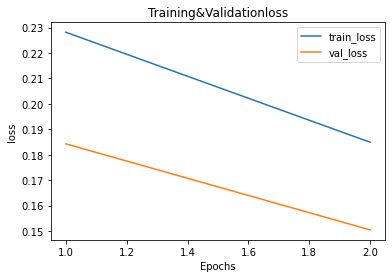

In [40]:
plotData(history_early_stopping, "loss")

In [41]:
# yeniden model oluşturma:

model=mnist_model(input_shape)
early_stopping_1=EarlyStopping(
                                monitor="val_accuracy",#izleyeceğimiz değer
                                patience=3, #herhangi bir gelişme olmasa da 3 adm devam eder.
                                min_delta=0.001, # 0.001'lik bir değişimi iyileşme olarak kabul eder.
                                mode="auto" #eğrinin özelliğine göre otomatik olarak takip eder
)

history_early_stopping_1=model.fit(
                                x=train_images,
                                y=train_labels,
                                epochs=50,
                                validation_split=0.20,
                                batch_size=64,
                                verbose=2,
                                callbacks=[early_stopping_1]
                        )


Epoch 1/50
750/750 - 30s - loss: 1.0895 - accuracy: 0.8269 - val_loss: 0.2815 - val_accuracy: 0.9231 - 30s/epoch - 40ms/step
Epoch 2/50
750/750 - 28s - loss: 0.3166 - accuracy: 0.9115 - val_loss: 0.1695 - val_accuracy: 0.9567 - 28s/epoch - 38ms/step
Epoch 3/50
750/750 - 27s - loss: 0.2336 - accuracy: 0.9340 - val_loss: 0.1415 - val_accuracy: 0.9622 - 27s/epoch - 36ms/step
Epoch 4/50
750/750 - 25s - loss: 0.1841 - accuracy: 0.9464 - val_loss: 0.1345 - val_accuracy: 0.9644 - 25s/epoch - 33ms/step
Epoch 5/50
750/750 - 24s - loss: 0.1596 - accuracy: 0.9528 - val_loss: 0.1315 - val_accuracy: 0.9676 - 24s/epoch - 32ms/step
Epoch 6/50
750/750 - 24s - loss: 0.1420 - accuracy: 0.9586 - val_loss: 0.1136 - val_accuracy: 0.9713 - 24s/epoch - 32ms/step
Epoch 7/50
750/750 - 24s - loss: 0.1243 - accuracy: 0.9637 - val_loss: 0.1420 - val_accuracy: 0.9703 - 24s/epoch - 32ms/step
Epoch 8/50
750/750 - 25s - loss: 0.1227 - accuracy: 0.9647 - val_loss: 0.1206 - val_accuracy: 0.9707 - 25s/epoch - 33ms/step


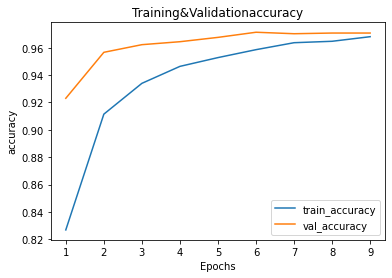

In [42]:
plotData(history_early_stopping_1,"accuracy" )

In [43]:
from keras.callbacks import CSVLogger

csv=CSVLogger("logs/result.csv")
model=mnist_model(input_shape)

history_csv_logger=model.fit(
                                x=train_images,
                                y=train_labels,
                                epochs=20,
                                validation_split=0.20,
                                batch_size=64,
                                verbose=2,
                                callbacks=[csv]
                            )


Epoch 1/20
750/750 - 32s - loss: 1.0998 - accuracy: 0.8404 - val_loss: 0.2503 - val_accuracy: 0.9383 - 32s/epoch - 42ms/step
Epoch 2/20
750/750 - 30s - loss: 0.3163 - accuracy: 0.9113 - val_loss: 0.1962 - val_accuracy: 0.9494 - 30s/epoch - 40ms/step
Epoch 3/20
750/750 - 29s - loss: 0.2255 - accuracy: 0.9362 - val_loss: 0.1659 - val_accuracy: 0.9616 - 29s/epoch - 39ms/step
Epoch 4/20
750/750 - 31s - loss: 0.1880 - accuracy: 0.9467 - val_loss: 0.1428 - val_accuracy: 0.9637 - 31s/epoch - 41ms/step
Epoch 5/20
750/750 - 32s - loss: 0.1619 - accuracy: 0.9517 - val_loss: 0.1431 - val_accuracy: 0.9653 - 32s/epoch - 42ms/step
Epoch 6/20
750/750 - 34s - loss: 0.1406 - accuracy: 0.9581 - val_loss: 0.1276 - val_accuracy: 0.9707 - 34s/epoch - 45ms/step
Epoch 7/20
750/750 - 33s - loss: 0.1405 - accuracy: 0.9603 - val_loss: 0.1382 - val_accuracy: 0.9685 - 33s/epoch - 43ms/step
Epoch 8/20
750/750 - 29s - loss: 0.1234 - accuracy: 0.9647 - val_loss: 0.1470 - val_accuracy: 0.9693 - 29s/epoch - 38ms/step


In [46]:
#!pip install pandas
import pandas as pd

pd.read_csv("logs/result.csv",index_col="epoch")

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.840354,1.099781,0.938333,0.250347
1,0.911333,0.316336,0.949417,0.196172
2,0.936250,0.225515,0.961583,0.165945
3,0.946667,0.188043,0.963667,0.142794
4,0.951708,0.161912,0.965250,0.143070
5,0.958063,0.140634,0.970750,0.127572
6,0.960333,0.140469,0.968500,0.138193
7,0.964729,0.123408,0.969250,0.147037
8,0.964083,0.123505,0.971000,0.124649


In [50]:
from keras.callbacks import ModelCheckpoint
path="models/"
checkpoint=ModelCheckpoint(
                           filepath= path,
                           save_freq= "epoch",
                           save_weights_only=True,
                           verbose=1
                           )

model=mnist_model(input_shape)

history_checkpoint=model.fit(
                                x=train_images,
                                y=train_labels,
                                epochs=10,
                                validation_split=0.20,
                                batch_size=64,
                                verbose=2,
                                callbacks=[checkpoint]
                            )

Epoch 1/10

Epoch 1: saving model to models\
750/750 - 28s - loss: 1.6165 - accuracy: 0.7934 - val_loss: 0.3227 - val_accuracy: 0.9203 - 28s/epoch - 37ms/step
Epoch 2/10

Epoch 2: saving model to models\
750/750 - 28s - loss: 0.4180 - accuracy: 0.8911 - val_loss: 0.2301 - val_accuracy: 0.9447 - 28s/epoch - 38ms/step
Epoch 3/10

Epoch 3: saving model to models\
750/750 - 23s - loss: 0.2943 - accuracy: 0.9214 - val_loss: 0.1899 - val_accuracy: 0.9553 - 23s/epoch - 31ms/step
Epoch 4/10

Epoch 4: saving model to models\
750/750 - 20s - loss: 0.2310 - accuracy: 0.9360 - val_loss: 0.1779 - val_accuracy: 0.9547 - 20s/epoch - 27ms/step
Epoch 5/10

Epoch 5: saving model to models\
750/750 - 25s - loss: 0.1859 - accuracy: 0.9474 - val_loss: 0.1742 - val_accuracy: 0.9611 - 25s/epoch - 33ms/step
Epoch 6/10

Epoch 6: saving model to models\
750/750 - 24s - loss: 0.1711 - accuracy: 0.9526 - val_loss: 0.1620 - val_accuracy: 0.9665 - 24s/epoch - 33ms/step
Epoch 7/10

Epoch 7: saving model to models\
7

In [52]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr=ReduceLROnPlateau(
                           monitor= "val_loss",
                           factor= 0.2,
                           patience=2,
                           min_lr=0.001,
                           verbose=1
                           )

model=mnist_model(input_shape)

history_reduce_lr=model.fit(
                                x=train_images,
                                y=train_labels,
                                epochs=20,
                                validation_split=0.20,
                                batch_size=64,
                                verbose=2,
                                callbacks=[reduce_lr]
                            )

Epoch 1/20
750/750 - 27s - loss: 1.1173 - accuracy: 0.8199 - val_loss: 0.3374 - val_accuracy: 0.9218 - lr: 0.0010 - 27s/epoch - 36ms/step
Epoch 2/20
750/750 - 24s - loss: 0.3243 - accuracy: 0.9108 - val_loss: 0.1807 - val_accuracy: 0.9551 - lr: 0.0010 - 24s/epoch - 32ms/step
Epoch 3/20
750/750 - 24s - loss: 0.2196 - accuracy: 0.9383 - val_loss: 0.1508 - val_accuracy: 0.9635 - lr: 0.0010 - 24s/epoch - 32ms/step
Epoch 4/20
750/750 - 24s - loss: 0.1741 - accuracy: 0.9500 - val_loss: 0.1394 - val_accuracy: 0.9657 - lr: 0.0010 - 24s/epoch - 32ms/step
Epoch 5/20
750/750 - 23s - loss: 0.1522 - accuracy: 0.9551 - val_loss: 0.1479 - val_accuracy: 0.9668 - lr: 0.0010 - 23s/epoch - 30ms/step
Epoch 6/20
750/750 - 21s - loss: 0.1373 - accuracy: 0.9603 - val_loss: 0.1152 - val_accuracy: 0.9717 - lr: 0.0010 - 21s/epoch - 28ms/step
Epoch 7/20
750/750 - 19s - loss: 0.1280 - accuracy: 0.9631 - val_loss: 0.1259 - val_accuracy: 0.9693 - lr: 0.0010 - 19s/epoch - 26ms/step
Epoch 8/20
750/750 - 20s - loss: 0

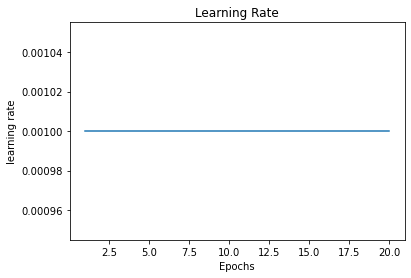

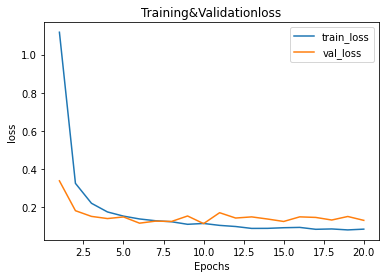

In [53]:
plotLR(history_reduce_lr)
plotData(history_reduce_lr,"loss")

In [56]:
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

    
model=mnist_model(input_shape)

history_lr_scheduler=model.fit(
                                x=train_images,
                                y=train_labels,
                                epochs=20,
                                validation_split=0.20,
                                batch_size=64,
                                verbose=2,
                                callbacks=[LearningRateScheduler(scheduler,verbose=1)]
                            )



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
750/750 - 28s - loss: 1.5147 - accuracy: 0.7964 - val_loss: 0.3214 - val_accuracy: 0.9217 - lr: 0.0010 - 28s/epoch - 37ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
750/750 - 21s - loss: 0.3959 - accuracy: 0.8947 - val_loss: 0.2133 - val_accuracy: 0.9475 - lr: 0.0010 - 21s/epoch - 28ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
750/750 - 19s - loss: 0.2802 - accuracy: 0.9213 - val_loss: 0.1755 - val_accuracy: 0.9559 - lr: 0.0010 - 19s/epoch - 26ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
750/750 - 26s - loss: 0.2332 - accuracy: 0.9352 - val_loss: 0.1439 - val_accuracy: 0.9635 - lr: 0.0010 - 26s/epoch - 34ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
750/750 - 24s - loss: 0.1945 - accura

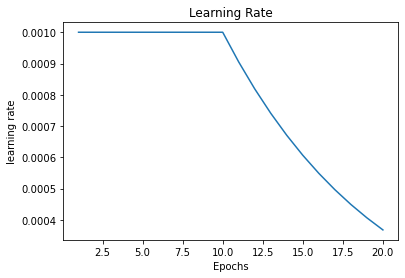

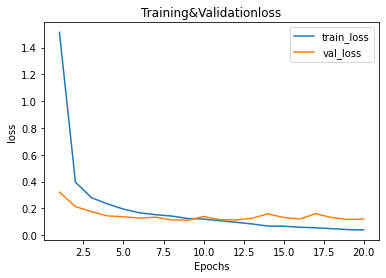

In [57]:
plotLR(history_lr_scheduler)
plotData(history_lr_scheduler,"loss")